## Q0. Please answer the following questions in your own words.

#### 1. What makes a model “linear”? “Linear” in what?
A linear model in machine learning is a formula that finds a best-fit line through a set of data points. It is "linear" when the relationship between the dependent variable and independent variables is represented by a straight line.

#### 2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There’s further explanation at the end of this document, if needed.

The coefficient of a dummy variable represents the expected change in the dependent variable y when that categorical variable is present. If we include an intercept in our model, one category must be left out (the reference category). The coefficient for each dummy variable tells us how much the dependent variable differs from the reference category.

#### 3. Can linear regression be used for classification? Explain why, or why not.
Linear regression is not suitable for classification because it predicts continuous values rather than discrete class labels. It assumes a linear relationship, which may not exist in classification problems.

#### 4. If you have a high accuracy on training but low on testing, what might be the problem? It’s also possible you’ll see a pattern in the residuals.
The reason is overfitting. The model has learned the training data too well, including noise and small patterns that do not generalize to new data. If residuals show a clear pattern, it suggests that the model is not generalizing well. The problem is that the model will perfom poorly on unseen data. 

#### 5. Review this page: Non-Linear with Linear What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable y and your features/control/response/independent variables x?

One way is to engineer a richer set of features by including expert knowledge which can be directly used by a simple linear model. A second way is to use a “kernel” to have a locally-based decision function instead of a global linear decision function.

#### 6. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
Intercept is the expected y when all x values are zero. Slope is the change in y per unit increase in 𝑥. Dummy variable coefficient represents the difference in y between that category and the reference group.

## Q1

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [30]:
df = pd.read_csv('q1.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [31]:
df.isnull().sum()

Price                   0
Review Scores Rating    0
Neighbourhood           0
Property Type           0
Room Type               0
dtype: int64

In [32]:
print(df.columns.tolist())

['Price', 'Review Scores Rating', 'Neighbourhood ', 'Property Type', 'Room Type']


#### 1. Compute the average prices and scores by Neighborhood ; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighborhood.

Average prices and scores by neighborhood:                      Price  Review Scores Rating
Neighbourhood                                   
Bronx            75.276498             91.654378
Brooklyn        127.747378             92.363497
Manhattan       183.664286             91.801496
Queens           96.857233             91.549057
Staten Island   146.166667             90.843750
The most expensive borough on average is: Manhattan


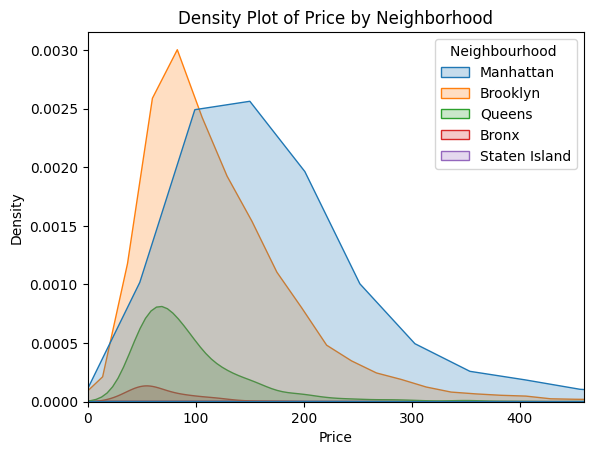

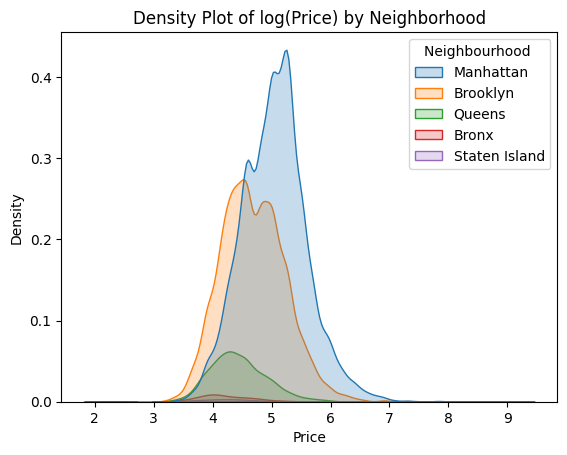

In [37]:
# Average prices and scores by Neighborhood
avg_stats = df.groupby('Neighbourhood ')[['Price', 'Review Scores Rating']].mean()
print("Average prices and scores by neighborhood:", avg_stats)

# Most expensive on average
most_expensive = avg_stats['Price'].idxmax()
print(f"The most expensive borough on average is: {most_expensive}")

# Kernel density plot of price
sns.kdeplot(data=df, x='Price', hue='Neighbourhood ', fill=True)
plt.xlim(0, np.percentile(df['Price'], 98))
plt.title('Density Plot of Price by Neighborhood')
plt.show()

# Kernel density plot of log(price)
sns.kdeplot(data=df, x=np.log(df['Price']), hue='Neighbourhood ', fill=True)
plt.title('Density Plot of log(Price) by Neighborhood')
plt.show()

### 2. Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [34]:
X = pd.get_dummies(df['Neighbourhood '], drop_first=False)
y = df['Price']

# linear model with NO intercept
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

coefficients = model.coef_
print(coefficients)

[ 75.2764977  127.74737834 183.66428632  96.8572327  146.16666667]


##### Each coefficient directly becomes the mean price of that neighborhood. In other words, for a single categorical variable with k categories, a regression with no intercept and k dummy variables yields coefficients that match the group means of the dependent variable for each category.

### 3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [36]:
X = pd.get_dummies(df['Neighbourhood '], drop_first=True)
y = df['Price']

# 3. linear model WITH intercept
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 75.27649769584667
Coefficients: [ 52.47088065 108.38778863  21.58073501  70.89016897]


##### The returned intercept of 75.27650 is the predicted mean price for the omitted neighborhood. Then, each coefficient represents how much higher or lower the mean price is for that neighborhood compared to the omitted reference neighborhood. Therefore we can say the following: Mean price of neighborhood =(intercept)+(coefficient for neighborhood).

### 4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighborhood . What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating?

In [61]:
X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood ']], drop_first = True)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

coefs = Series(model.coef_, index=model.feature_names_in_)
print(coefs)

R^2: 0.072
RMSE: 121.49
Review Scores Rating              1.007598
Neighbourhood _Brooklyn          57.246732
Neighbourhood _Manhattan        113.129859
Neighbourhood _Queens            26.283642
Neighbourhood _Staten Island     82.074131
dtype: float64


#### R^2 on Test Set: 0.072, RMSE on Test Set: 121.49, Coefficient on Review Scores Rating: 1.007598, Most Expensive Place: Manhattan

### 5. Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. What is the R^2 and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [60]:
X = pd.get_dummies(df[['Review Scores Rating', 'Neighbourhood ', 'Property Type']], drop_first = True)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 99)

model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

rmse = mean_squared_error(y_test, y_pred) ** 0.5
print("RMSE:", round(rmse,3))

coefs = Series(model.coef_, index=model.feature_names_in_)
print(coefs)

R^2: 0.086
RMSE: 120.568
Review Scores Rating             1.006896e+00
Neighbourhood _Brooklyn          6.461103e+01
Neighbourhood _Manhattan         1.255588e+02
Neighbourhood _Queens            3.166652e+01
Neighbourhood _Staten Island     7.462722e+01
Property Type_Bed & Breakfast   -3.274745e+01
Property Type_Boat               6.195455e+01
Property Type_Bungalow           5.628966e+01
Property Type_Cabin              2.575717e-14
Property Type_Camper/RV         -2.254063e+01
Property Type_Castle            -4.018187e+01
Property Type_Chalet            -2.922726e+01
Property Type_Condominium        9.128475e+01
Property Type_Dorm              -4.821102e+01
Property Type_House              3.541865e+01
Property Type_Hut               -1.341405e+02
Property Type_Lighthouse        -9.023415e+01
Property Type_Loft               5.993960e+01
Property Type_Other              4.872083e+01
Property Type_Townhouse          3.856048e+01
Property Type_Treehouse         -7.609568e+01
Property 

#### R^2 on test data: 0.086, RMSE on test data: 120.568, Coefficient on Review Scores Rating: 1.0069, Most Expensive Property Type: Condominium

### 6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.

#### The coefficient on Review Scores Rating decreased slightly from Part 4 to Part 5 because adding Property Type accounted for additional variation in Price that was previously accounted by the Review Scores Rating. We can see that in Part 4, where we don't control the Property Type, the model accounts the price variation more to the Review Scores Rating. Once Property Type was included in Part 5, it added more complexity to the model as it better separated the impact of different factors, leading to a slightly lower estimate for Review Scores Rating. 

## Q2

In [77]:
df2 = pd.read_csv('cars_hw.csv')
df2.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


#### 1. Load cars_hw.csv. These data were really dirty, and I’ve already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly skewed variables that require a log or arcsinh transformation) Note this is different than normalizing: there is a text below that explains further. Clean the data however you think is most appropriate.

In [78]:
df2.drop('Unnamed: 0', axis=1, inplace=True)
numerical_cols = df2.select_dtypes(include=['number']).columns
numerical_cols

Index(['Make_Year', 'Mileage_Run', 'Seating_Capacity', 'Price'], dtype='object')

#### Removing Outliers & Transforming Skewed Variables

In [79]:
# removing outliers
# function for removing outliers
def remove_outliers(df2, cols):
    for col in cols:
        Q1 = df2[col].quantile(0.25)
        Q3 = df2[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df2 = df2[(df2[col] >= lower_bound) & (df2[col] <= upper_bound)]
    return df2

df2 = remove_outliers(df2, numerical_cols)

In [80]:
# checking for skewness and adjusting data
from scipy.stats import skew

skewed_features = df2[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
highly_skewed = skewed_features[abs(skewed_features) > 1].index

for col in highly_skewed:
    if df[col].min() > 0:  # Log transform if all values are positive
        df[col] = np.log(df[col])
    else:  # arcsinh if data contains zeros or negatives
        df[col] = np.arcsinh(df[col])


/var/folders/hm/xnw5nd2n1yl25z8xd614c56w0000gn/T/ipykernel_79411/2100235249.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewed_features = df2[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)


#### 2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [81]:
print(df2['Price'].describe())

count    8.780000e+02
mean     6.693200e+05
std      2.531389e+05
min      2.370000e+05
25%      4.582500e+05
50%      6.390000e+05
75%      8.262500e+05
max      1.464000e+06
Name: Price, dtype: float64


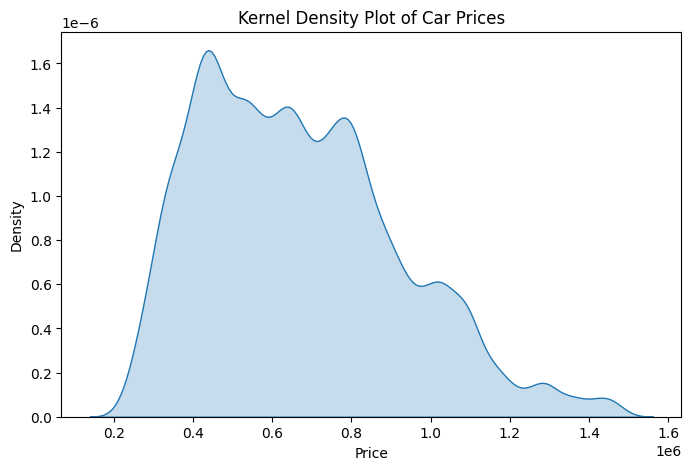

In [83]:
# Kernel Density Plot for Price
plt.figure(figsize=(8, 5))
sns.kdeplot(df2['Price'], fill=True, bw_adjust=0.5)
plt.title("Kernel Density Plot of Car Prices")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

In [84]:
price_summary_by_brand = df2.groupby('Make')['Price'].describe()
print(price_summary_by_brand)

               count          mean            std        min        25%  \
Make                                                                      
Chevrolet        6.0  4.535000e+05  246606.366503   267000.0   288500.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            52.0  7.211731e+05  140927.699605   290000.0   635000.0   
Honda           69.0  7.964928e+05  256112.660366   316000.0   580000.0   
Hyundai        304.0  6.884375e+05  273012.825123   248000.0   484750.0   
Jeep             1.0  1.290000e+06            NaN  1290000.0  1290000.0   
Kia              1.0  1.369000e+06            NaN  1369000.0  1369000.0   
Mahindra         2.0  1.177000e+06  141421.356237  1077000.0  1127000.0   
Maruti Suzuki  282.0  5.840355e+05  212976.780561   237000.0   411250.0   
Nissan           4.0  8.842500e+05  289559.867155   475000.0   782500.0   
Renault         55.0  6.530364e+05  236652.813651   287000.0   454500.0   
Skoda            4.0  6.8

/var/folders/hm/xnw5nd2n1yl25z8xd614c56w0000gn/T/ipykernel_79411/550710588.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df2, x='Price', hue='Make', fill=True, bw_adjust=0.7)


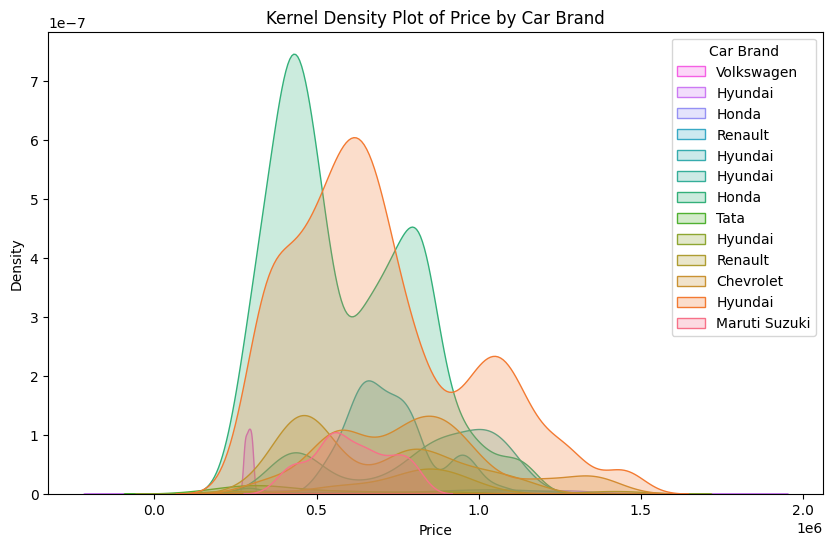

In [89]:
# Grouped Kernel Density Plot by Make
plt.figure(figsize=(10, 6))
sns.kdeplot(df2, x='Price', hue='Make', fill=True, bw_adjust=0.7)
plt.title("Kernel Density Plot of Price by Car Brand")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend(df2['Make'], title="Car Brand")
plt.show()

In [94]:
avg_price_by_brand = df2.groupby('Make')['Price'].mean().sort_values(ascending=False)
print("Most expensive car brands:")
print(avg_price_by_brand)

Most expensive car brands:
Make
Kia              1.369000e+06
Jeep             1.290000e+06
Mahindra         1.177000e+06
Nissan           8.842500e+05
Tata             8.024375e+05
Toyota           8.003400e+05
Honda            7.964928e+05
Ford             7.211731e+05
Hyundai          6.884375e+05
Skoda            6.847500e+05
Renault          6.530364e+05
Volkswagen       6.058276e+05
Maruti Suzuki    5.840355e+05
Chevrolet        4.535000e+05
Datsun           2.896667e+05
Name: Price, dtype: float64


#### The most expensive brand to purchase a car from is Nissan. As for the prices in general, most tend to stay within 6 to 8 (in hundreds of thousands).

### 3. Split the data into an 80% training set and a 20% testing set.

In [95]:
# Excluding Price because it's the target
X = df2.drop(columns=['Price'])  
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#### 4. Make a model where you regress price on the numeric variables alone; what is the R^2 and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the R^2 and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the R^2 and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [97]:
# Identifying numeric and categorical columns 
numeric_cols = df2.select_dtypes(include=['number']).columns.drop('Price') #excluding Price because it's the target
categorical_cols = df2.select_dtypes(include=['object']).columns

# One-hot encoding the categorical variables (drop_first=True to avoid dummy variable trap)
X_categorical = pd.get_dummies(df2[categorical_cols], drop_first=True)

# Splitting the categorical variables into train-test using the same random state as before
X_train_cat, X_test_cat, _, _ = train_test_split(X_categorical, y, test_size=0.2, random_state=7)

# Because I need three models. I will use a function to train and evaluate the models
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model_name):
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # R^2 and RMSE
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
    rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

    print(f"\n{model_name}:")
    print(f"R² (Train): {r2_train}, RMSE (Train): {rmse_train}")
    print(f"R² (Test): {r2_test}, RMSE (Test): {rmse_test}")

    return r2_test, rmse_test

# Model 1: Numeric Variables Only
r2_test_num, rmse_test_num = train_and_evaluate_model(X_train[numeric_cols], X_test[numeric_cols], y_train, y_test, "Model 1: Numeric Only")

# Model 2: Categorical Variables Only (One-Hot Encoded)
r2_test_cat, rmse_test_cat = train_and_evaluate_model(X_train_cat, X_test_cat, y_train, y_test, "Model 2: Categorical Only")

# Model 3: Combined Model (Numeric + Categorical)
X_train_combined = pd.concat([X_train[numeric_cols], X_train_cat], axis=1)
X_test_combined = pd.concat([X_test[numeric_cols], X_test_cat], axis=1)

r2_test_combined, rmse_test_combined = train_and_evaluate_model(X_train_combined, X_test_combined, y_train, y_test, "Model 3: Combined")

# Comparing the Performance
r2_improvement = r2_test_combined - max(r2_test_num, r2_test_cat)
rmse_improvement = min(rmse_test_num, rmse_test_cat) - rmse_test_combined

print("\nPerformance Comparison:")
print(f"Joint Model R² Improvement: {r2_improvement:.3f}")
print(f"Joint Model RMSE Improvement: {rmse_improvement:.3f}")


Model 1: Numeric Only:
R² (Train): 0.3531689319422986, RMSE (Train): 201434.52911122513
R² (Test): 0.3471415595026238, RMSE (Test): 211168.41860009523

Model 2: Categorical Only:
R² (Train): 0.5857675391038701, RMSE (Train): 161198.3330288171
R² (Test): 0.6056712553764861, RMSE (Test): 164115.14999898148

Model 3: Combined:
R² (Train): 0.7588739754556286, RMSE (Train): 122987.3729460949
R² (Test): 0.7669550197939901, RMSE (Test): 126165.12789446519

Performance Comparison:
Joint Model R² Improvement: 0.161
Joint Model RMSE Improvement: 37950.022


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_reg

##### The categorical-only model performed better than the numeric-only model, with an R² of 0.606 vs. 0.347 on the test set, meaning categorical variables explain more of the variation in price. The combined model, which includes both numeric and categorical variables, performed the best, achieving an R² of 0.767 and the lowest RMSE of 126,165, indicating better predictive accuracy. The joint model improved R² by 0.161 over the best individual model and reduced RMSE by 37,950, confirming that using both numeric and categorical features together results in a significantly stronger model. 

#### 5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you’re using in the regression. As you increase the degree of the expansion, how do the R^2 and RMSE change? At what point does R^2 go negative on the test set? For your best model with expanded features, what is the R^2 and RMSE? How does it compare to your best model from part 4?

In [101]:
from sklearn.preprocessing import PolynomialFeatures

results = []

for degree in range(1, 6):  # Testing polynomial degrees from 1 to 5
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train[numeric_cols])  # Use correct numeric training data
    X_test_poly = poly.transform(X_test[numeric_cols])  # Use correct numeric test data

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred_poly = model.predict(X_train_poly)
    y_test_pred_poly = model.predict(X_test_poly)

    r2_train = r2_score(y_train, y_train_pred_poly)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
    r2_test = r2_score(y_test, y_test_pred_poly)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))

    results.append((degree, r2_train, rmse_train, r2_test, rmse_test))

print(results)

[(1, 0.3531689319422986, np.float64(201434.52911122513), 0.3471415595026238, np.float64(211168.41860009523)), (2, 0.3667515194345693, np.float64(199308.38044618513), 0.3537494369781259, np.float64(210097.03486756622)), (3, 0.37288976099349846, np.float64(198340.05429267226), 0.3533996040695079, np.float64(210153.89277761403)), (4, 0.37185010459338563, np.float64(198504.39550431658), 0.35266562928628487, np.float64(210273.13482490391)), (5, 0.3711321851849775, np.float64(198617.7995368376), 0.3515635131749937, np.float64(210452.05847298715))]


##### As the degree of the polynomial expansion increases, R² on both the training and test sets shows only slight improvements, while RMSE remains relatively stable, indicating diminishing returns from higher-degree polynomial features. R² does not go negative within the tested range (degrees 1 to 5), suggesting no extreme overfitting yet. The best model within this range is at degree 2, with R² = 0.354 on the test set and RMSE = 210,097, which is still significantly worse than the best model from Part 4 (R² = 0.767, RMSE = 126,165). This suggests that polynomial expansion of numerical features alone is not as effective as incorporating categorical variables in the model.

#### 6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

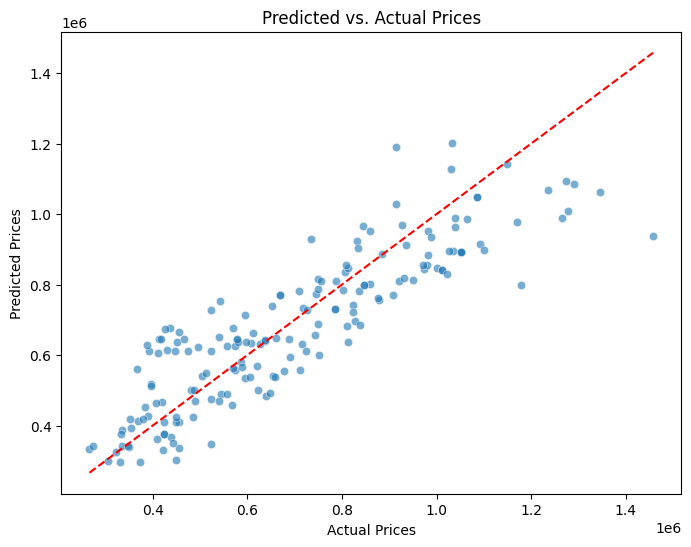

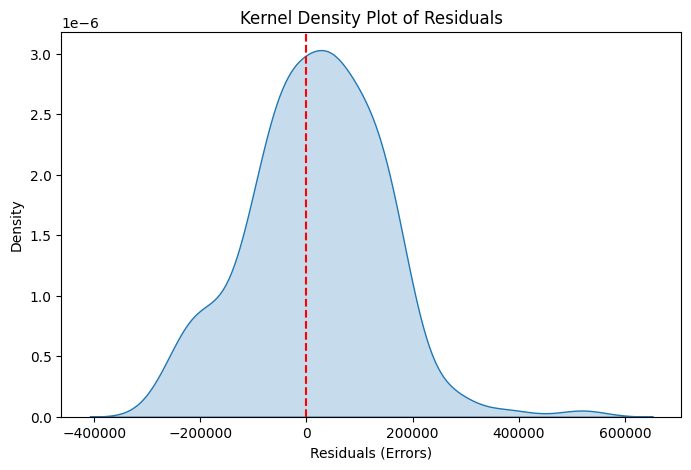

In [105]:
# Recreating the combined dataset for the best model (Numeric + Categorical)
X_train_combined = pd.concat([X_train[numeric_cols], X_train_cat], axis=1)
X_test_combined = pd.concat([X_test[numeric_cols], X_test_cat], axis=1)

# This is the best model from Part 4
best_model = LinearRegression()
best_model.fit(X_train_combined, y_train)

# Predictions on test set
y_test_pred_best = best_model.predict(X_test_combined)

# Residuals (errors)
residuals = y_test - y_test_pred_best

# Scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs. Actual Prices")
plt.show()

# Kernel density plot of residuals
plt.figure(figsize=(8, 5))
sns.kdeplot(residuals, fill=True)
plt.axvline(0, color='red', linestyle='--')  # Reference line at zero
plt.xlabel("Residuals (Errors)")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Residuals")
plt.show()


In [103]:
# Evaluate residual distribution
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)

print(residuals_mean, residuals_std)

17571.07099207601 124935.57123901176


##### The predicted values and actual values do not perfectly line up along the diagonal; this suggests some prediction error, but they still follow a somewhat linear trend, indicating that the model captures a general pattern in the data. The kernel density plot of residuals shows a roughly bell-shaped distribution centered around zero. However,  there is some skewness and heavy tails, suggesting that the model's errors are not perfectly normal. The mean residual of ~17571 indicates a small bias, while the standard deviation of ~124935 suggests high variability in errors. Strengths of the model include its ability to capture overall price trends, while weaknesses include high variance and potential underestimation of extreme values.

# Q3

### 1. Find a dataset on a topic you’re interested in. Some easy options are data.gov, kaggle.com, and data.world.

In [107]:
data = pd.read_csv('health.data.csv')
data.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


### 2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.

In [108]:
data.isnull().sum()

Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64

In [110]:
data.rename(columns={
    'Height (cm)': 'Height',
    'Weight (kg)': 'Weight',
    'Blood Pressure (s/d)': 'Blood_Pressure',
    'Cholesterol Level (mg/dL)': 'Cholesterol',
    'Blood Glucose Level (mg/dL)': 'Blood_Glucose',
    'Bone Density (g/cm²)': 'Bone_Density',
    'Vision Sharpness': 'Vision',
    'Hearing Ability (dB)': 'Hearing',
    'Physical Activity Level': 'Physical_Activity',
    'Smoking Status': 'Smoking',
    'Alcohol Consumption': 'Alcohol',
    'Chronic Diseases': 'Chronic_Diseases',
    'Medication Use': 'Medication',
    'Family History': 'Family_History',
    'Cognitive Function': 'Cognitive_Function',
    'Mental Health Status': 'Mental_Health',
    'Sleep Patterns': 'Sleep',
    'Stress Levels': 'Stress',
    'Pollution Exposure': 'Pollution',
    'Sun Exposure': 'Sun_Exposure',
    'Education Level': 'Education',
    'Income Level': 'Income',
    'Age (years)': 'Age'
}, inplace=True)

for column in data.columns:
  data[column].fillna(data[column].mode()[0], inplace = True)

data.isnull().sum()


/var/folders/hm/xnw5nd2n1yl25z8xd614c56w0000gn/T/ipykernel_79411/3750794208.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace = True)
/var/folders/hm/xnw5nd2n1yl25z8xd614c56w0000gn/T/ipykernel_79411/3750794208.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

Gender                0
Height                0
Weight                0
Blood_Pressure        0
Cholesterol           0
BMI                   0
Blood_Glucose         0
Bone_Density          0
Vision                0
Hearing               0
Physical_Activity     0
Smoking               0
Alcohol               0
Diet                  0
Chronic_Diseases      0
Medication            0
Family_History        0
Cognitive_Function    0
Mental_Health         0
Sleep                 0
Stress                0
Pollution             0
Sun_Exposure          0
Education             0
Income                0
Age                   0
dtype: int64

### EDA

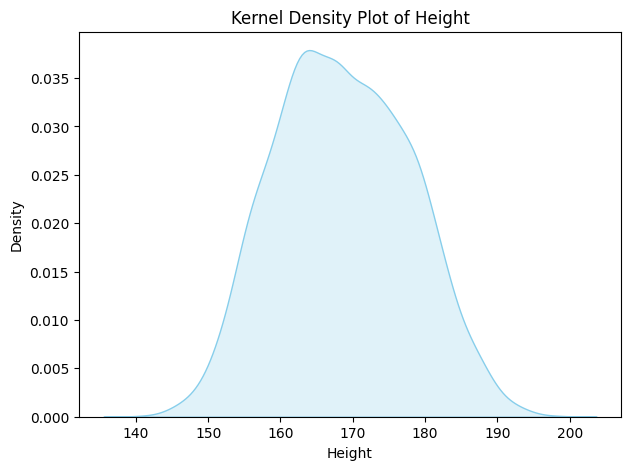

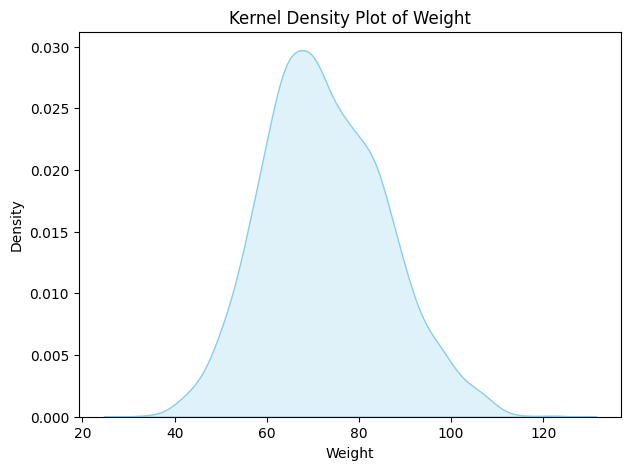

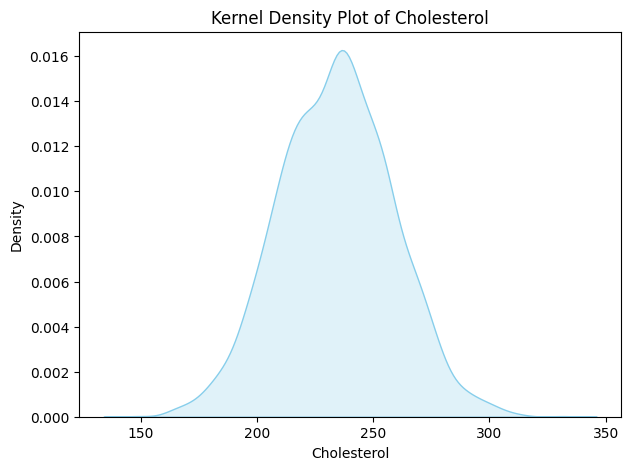

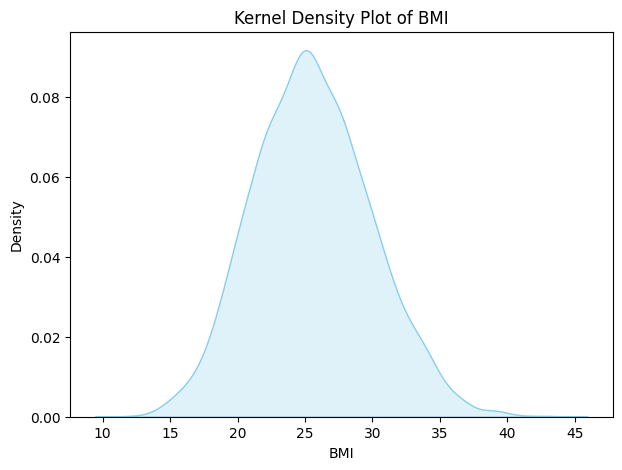

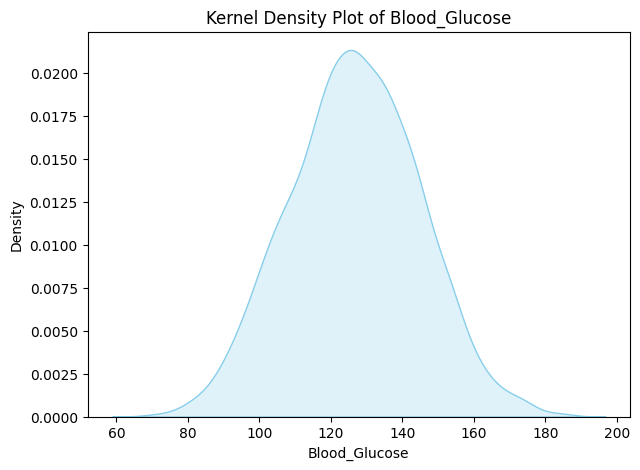

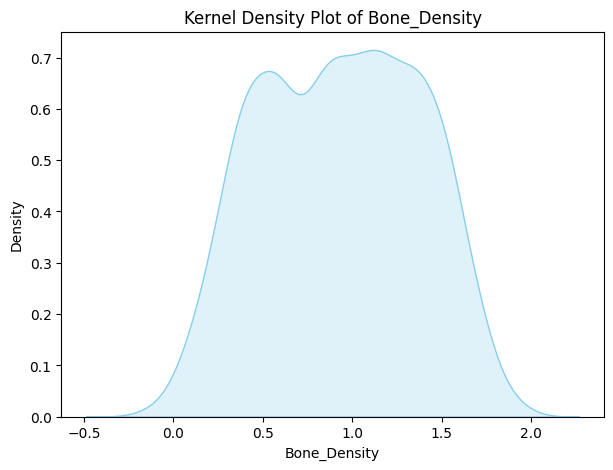

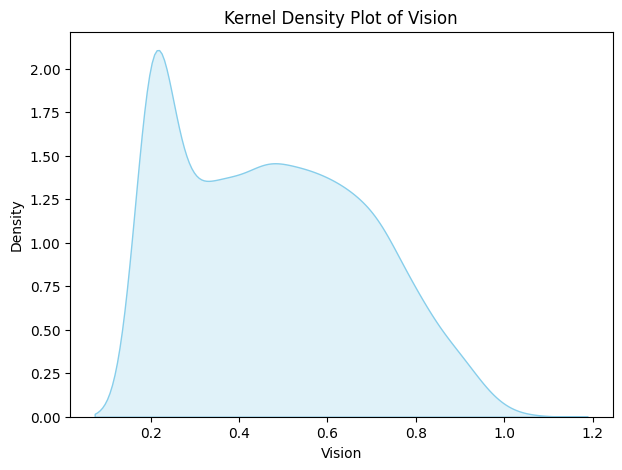

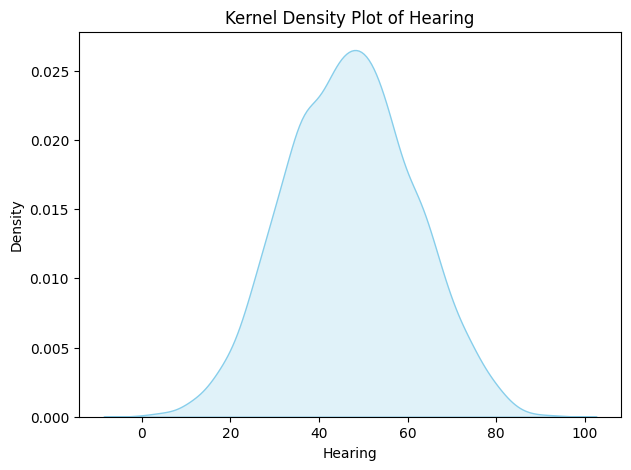

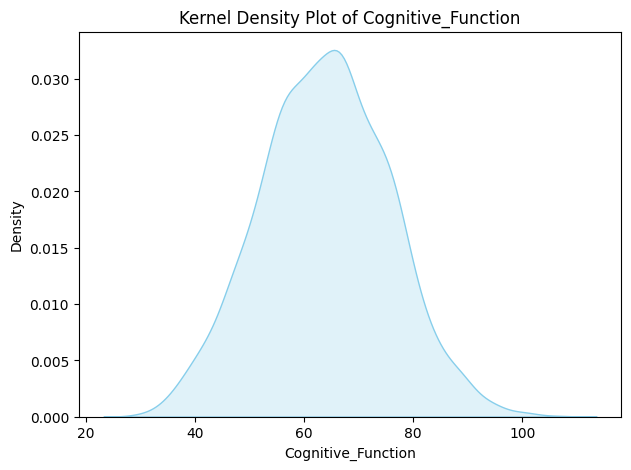

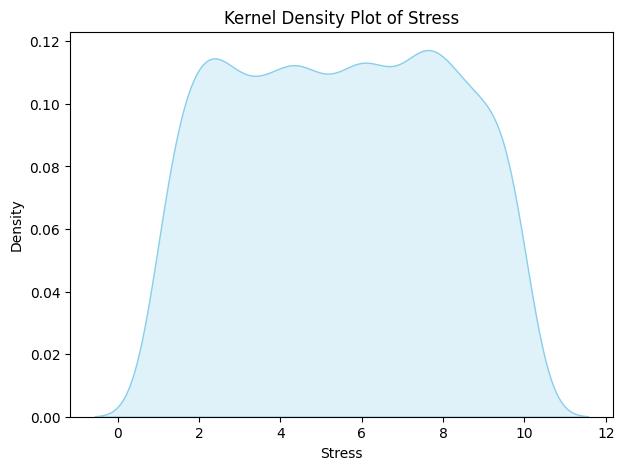

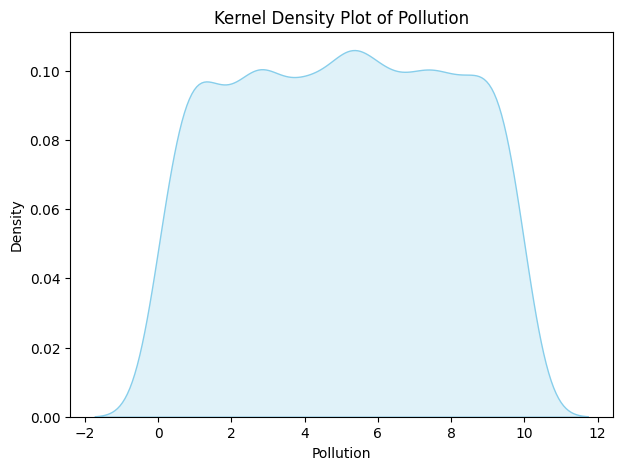

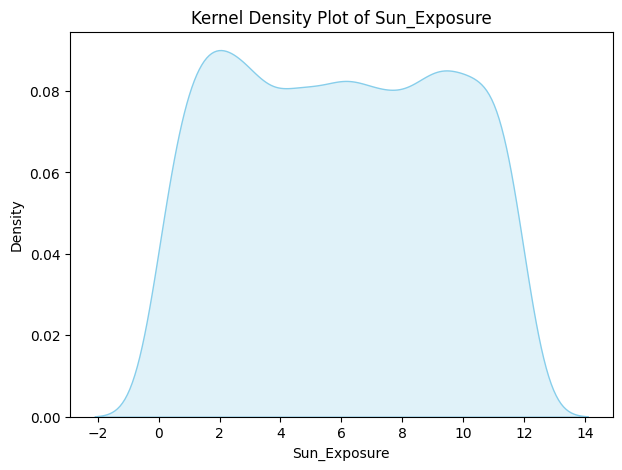

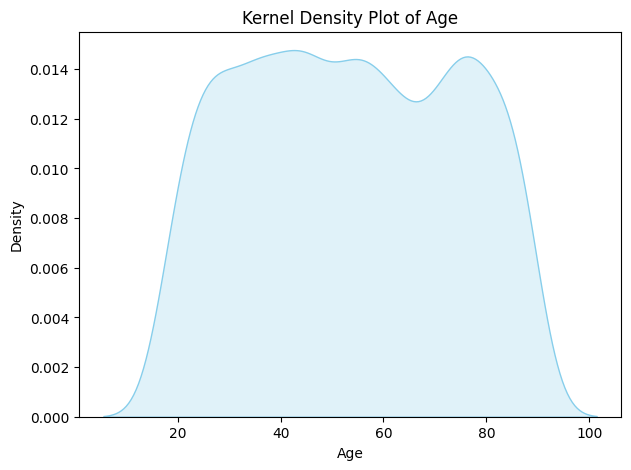

<Axes: >

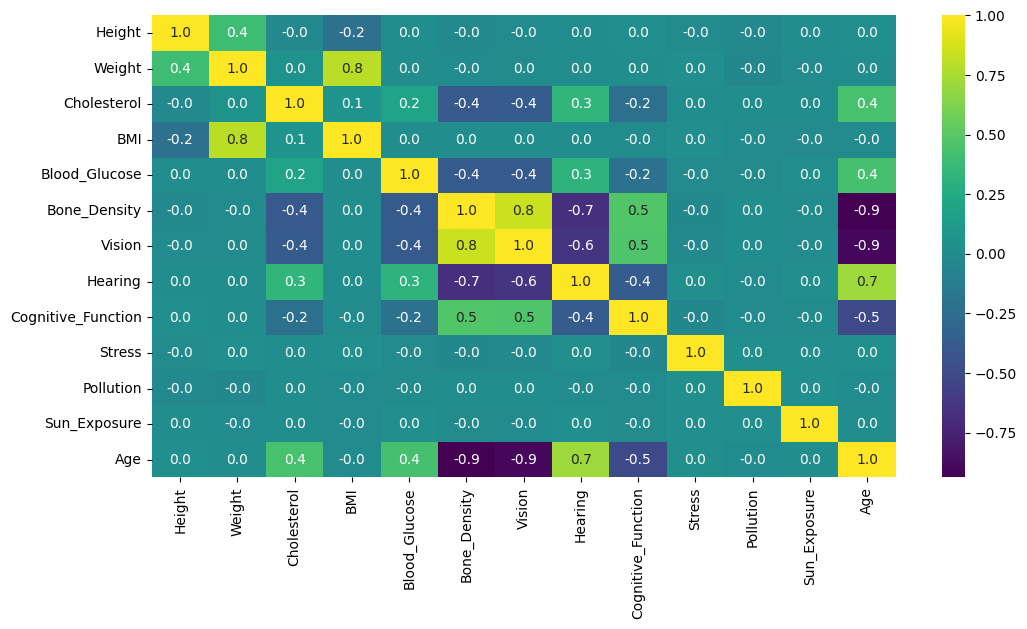

In [122]:
# kde plots
for col in data.select_dtypes(exclude='object').columns:
    plt.figure(figsize=(7, 5))
    sns.kdeplot(data[col], fill=True, color='skyblue')
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.title(f"Kernel Density Plot of {col}")
    plt.show()

# heatmap displaying the correlation between different variables
plt.figure(figsize=(12,6))
sns.heatmap(data.select_dtypes(exclude= ['object']).corr(), annot = True, cmap = 'viridis', fmt = '.1f')

### Picking the target/outcome variable and features/predictors

In [117]:
# age will be the target variable and the rest will be features
X = data.drop('Age', axis = 1)
y = data['Age']

### 3. Split the sample into an ~80% training set and a ~20% test set.


In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Identifing numerical and categorical columns
numerical_cols = X.select_dtypes(exclude=['object']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Standardizing the numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Encoding the categorical variables
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((2400, 25), (600, 25))

### 4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the RMSE on the test set.

In [119]:
# I will first define different models with subsets of features
models = {
    "Full Model": X_train,  # All features
    "Demographics Only": X_train[["Income", "Education", "Family_History"]],  # Socioeconomic factors
    "Health Metrics Only": X_train[["Weight", "Height", "Blood_Pressure", "Cholesterol", "Blood_Glucose", "Bone_Density"]],  # Health-related factors
    "Lifestyle Only": X_train[["Physical_Activity", "Smoking", "Alcohol", "Sleep", "Stress", "Pollution", "Sun_Exposure"]]  # Lifestyle behaviors
}

In [120]:
# Traiing the models and evaluating the performance
results = []

for name, X_train_subset in models.items():
    X_test_subset = X_test[X_train_subset.columns]  # Select same features in test set

    model = LinearRegression()
    model.fit(X_train_subset, y_train)
    y_test_pred = model.predict(X_test_subset)

    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = model.score(X_test_subset, y_test)

    results.append((name, r2_test, rmse_test))

# I learned from Q1 an Q2 that it would be optimal for me to convert results into a DataFrame for easier interpretation
regression_results_df = pd.DataFrame(results, columns=["Model", "R² (Test)", "RMSE (Test)"])
print(regression_results_df)

                 Model  R² (Test)  RMSE (Test)
0           Full Model   0.927142     5.464135
1    Demographics Only  -0.011264    20.357087
2  Health Metrics Only   0.882165     6.948960
3       Lifestyle Only   0.033469    19.901753


In [121]:
# Identifing the best-performing model
best_model = regression_results_df.loc[regression_results_df["R² (Test)"].idxmax()]
print("Best Model:", best_model)

Best Model: Model          Full Model
R² (Test)        0.927142
RMSE (Test)      5.464135
Name: 0, dtype: object


### 5. Which model performed the best, and why? 6. What did you learn?

#### The Full Model performed the best, achieving an R² of 0.927 and the lowest RMSE of 5.46, indicating that using all available features provides the most accurate predictions for age. The Health Metrics Only model also performed well (R² = 0.882, RMSE = 6.95), suggesting that physiological factors significantly contribute to predicting age. However, the Demographics Only model performed poorly (R² ≈ -0.011), meaning socioeconomic factors like income and education alone are not strong predictors. The Lifestyle Only model also had low predictive power (R² = 0.033), suggesting that while lifestyle influences health, it may not directly determine age as well as biological factors. Throughout this analysis, I learned that combining multiple feature types can improve prediction accuracy. However, it is also important to mention that this is not always true, as we have seen in Q2.